In [8]:
import yfinance as yf
import pandas as pd

# Downloading historical data from Yahoo Finance
nasdaq_data = yf.download('^IXIC', start='2010-01-01', end='2022-06-05')  
nse_data = yf.download('^NSEI', start='2010-01-01', end='2022-06-05') 

# Extract the closing prices
nasdaq_closing_prices = nasdaq_data['Close']
nse_closing_prices = nse_data['Close']

# Calculate the correlation coefficient
correlation_coefficient = nasdaq_closing_prices.corr(nse_closing_prices)

print("Correlation Coefficient: ", correlation_coefficient)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Correlation Coefficient:  0.9692323907143071




> Task 1 



Since we know that the correlation coefficient ranges from -1 to 1, where a positive value signifies a positive relationship between the variables being analyzed (in our case NSE and NASDAQ). In our case, a correlation coefficient of approximately 0.97 suggests that as one index increases, the other tends to increase as well, and vice versa.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


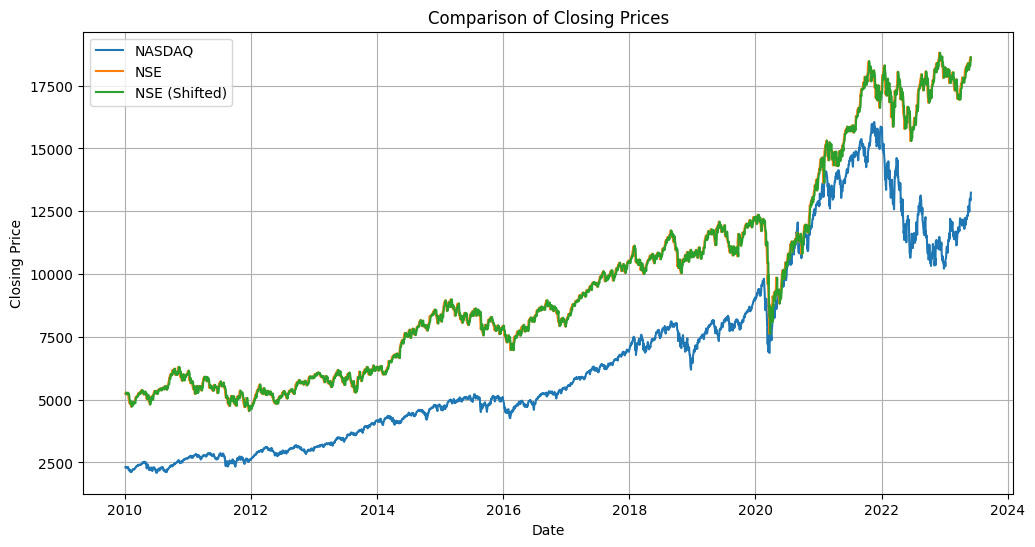

Lead-Lag Relationship: NSE leads NASDAQ
Correlation Coefficient: 0.951205703517075


In [32]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data from Yahoo Finance
nasdaq_data = yf.download('^IXIC', start='2010-01-01', end='2023-06-05')
nse_data = yf.download('^NSEI', start='2010-01-01', end='2023-06-05')

# Extract the closing prices
nasdaq_closing_prices = nasdaq_data['Close']
nse_closing_prices = nse_data['Close']

# Calculate the correlation coefficient
correlation_coefficient = nasdaq_closing_prices.corr(nse_closing_prices)

# Shift the NSE closing prices by one day
nse_closing_prices_shifted = nse_closing_prices.shift(3)

# Calculate the correlation coefficient with the shifted NSE closing prices
correlation_coefficient_shifted = nasdaq_closing_prices.corr(nse_closing_prices_shifted)

# Determine the lead-lag relationship based on correlation changes
if correlation_coefficient_shifted > correlation_coefficient:
    relationship = "NASDAQ leads NSE"
else:
    relationship = "NSE leads NASDAQ"

# Plot the original closing prices and the shifted closing prices
plt.figure(figsize=(12, 6))
plt.plot(nasdaq_closing_prices, label='NASDAQ')
plt.plot(nse_closing_prices, label='NSE')
plt.plot(nse_closing_prices_shifted, label='NSE (Shifted)')
plt.title('Comparison of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

print("Lead-Lag Relationship:", relationship)
print("Correlation Coefficient:", correlation_coefficient)



Task 2 

Lead-Lag relationship is same as correlation when we shift one of the data by some days . So , we can try to shift one index (say forward) and suppose if we see increase in the correlation coeff then that index is leading and vice-versa . So , i tried to shift NSE by suppose 1 day initially and got some correlation coeff value , now on increasing the shift-days , i got an increase in the correlation coeff ( ig the increase was till 4 days) and hence i inferred that NSE was leading , tried to confirm that using graph also .

TASK 3 

Now since NSE is leading in our case , it would be appropriate to choose the NSE index for parameter optimization. This is because - 


1.   As the NSE leads the NASDAQ index, changes in the NSE index may provide us early indications of potential movements in the NASDAQ index. By optimizing parameters based on the NSE index , we can potentially capture and act upon market trends and signals ahead of time.
2.   This lead-lag relationship also gives us idea of market efficiency , i mean that since NSE leads , this means NSE index reacts to market information and developments more quickly than the NASDAQ index. By optimizing parameters for the NSE index, we are aligning our strategy with a potentially more efficient market where information is quickly incorporated into prices.



[*********************100%***********************]  1 of 1 completed
Metrics:
             Returns  Cumulative Returns  Max Drawdown  Sharpe Ratio  \
Date                                                                   
2023-05-29  0.005368            3.554652     -0.384399      0.649399   
2023-05-30  0.001893            3.561379     -0.384399      0.649399   
2023-05-31 -0.005337            3.542372     -0.384399      0.649399   
2023-06-01 -0.002517            3.533456     -0.384399      0.649399   
2023-06-02  0.002507            3.542315     -0.384399      0.649399   

            Sortino Ratio  
Date                       
2023-05-29       1.030174  
2023-05-30       1.030174  
2023-05-31       1.030174  
2023-06-01       1.030174  
2023-06-02       1.030174  


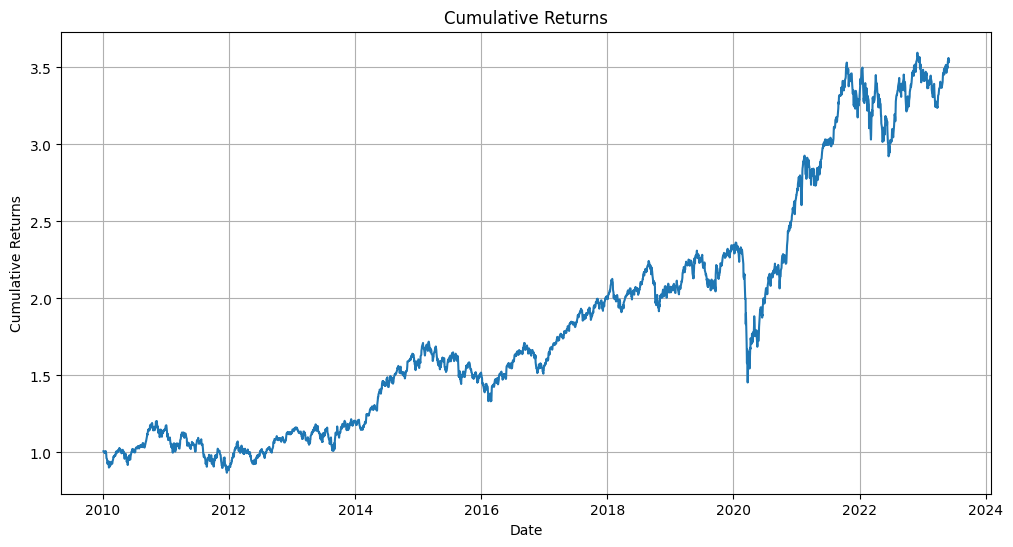

In [42]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Download the historical data for the NSE index
nse_data = yf.download('^NSEI', start='2010-01-01', end='2023-06-05')

# Calculate the MACD values manually
nse_data['EMA12'] = nse_data['Close'].ewm(span=12, adjust=False).mean()
nse_data['EMA26'] = nse_data['Close'].ewm(span=26, adjust=False).mean()
nse_data['MACD'] = nse_data['EMA12'] - nse_data['EMA26']
nse_data['Signal'] = nse_data['MACD'].ewm(span=9, adjust=False).mean()

# Generate trading signals based on the MACD
nse_data['Signal'] = np.where(nse_data['MACD'] > nse_data['Signal'], 1, -1)

# Create a DataFrame to store the trading signals and merge it with the NSE data
signals_df = pd.DataFrame(nse_data['Signal'], columns=['Signal'])
merged_data = pd.concat([nse_data, signals_df], axis=1)

# Define a function to calculate various metrics
def calculate_metrics(data):
    data['Returns'] = data['Close'].pct_change()
    data['Cumulative Returns'] = (1 + data['Returns']).cumprod()
    data['Rolling Max'] = data['Cumulative Returns'].rolling(window=len(data), min_periods=1).max()
    data['Drawdown'] = data['Cumulative Returns'] / data['Rolling Max'] - 1
    data['Max Drawdown'] = data['Drawdown'].min()
    data['Sharpe Ratio'] = data['Returns'].mean() / data['Returns'].std() * np.sqrt(252)
    downside_returns = data['Returns'].where(data['Returns'] < 0, 0)
    data['Sortino Ratio'] = data['Returns'].mean() / downside_returns.std() * np.sqrt(252)
    return data

# Calculate the metrics using the merged data
metrics_data = calculate_metrics(merged_data)

# Print the metrics
print("Metrics:")
print(metrics_data[['Returns', 'Cumulative Returns', 'Max Drawdown', 'Sharpe Ratio', 'Sortino Ratio']].tail())

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(metrics_data['Cumulative Returns'])
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()




[*********************100%***********************]  1 of 1 completed
Returns:
3289   -0.005337
3290   -0.002517
3291    0.002507
3292    0.003224
3293    0.000277
Name: Close, dtype: float64
Cumulative Returns:
3289    2.542372
3290    2.533456
3291    2.542315
3292    2.553734
3293    2.554719
Name: Close, dtype: float64
Max Drawdowns:
3289   -0.384399
3290   -0.384399
3291   -0.384399
3292   -0.384399
3293   -0.384399
Name: Close, dtype: float64
Sharpe Ratio: 0.6507528134770043
Sortino Ratio: 0.8552351961064497
Signal Returns - Bollinger Bands:
3289    0.005337
3290   -0.000000
3291    0.000000
3292    0.000000
3293    0.000000
Name: Return_BB, dtype: float64
Signal Returns - Keltner Channel:
3289    0.005337
3290   -0.000000
3291    0.000000
3292    0.000000
3293    0.000000
Name: Return_KC, dtype: float64


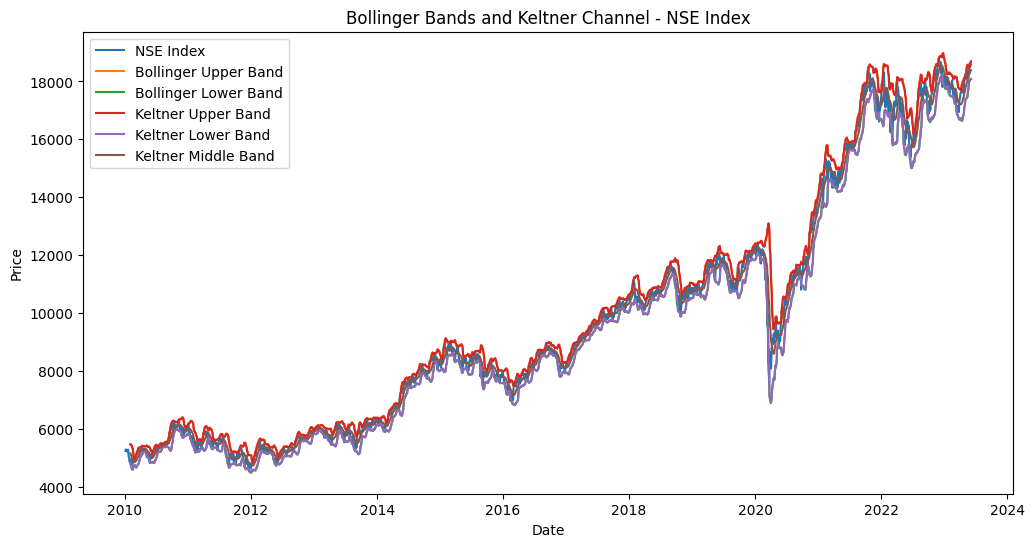

In [66]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the ticker symbol for the NSE index
ticker_symbol = "^NSEI"

# Set the start and end dates for the data
start_date = "2010-01-01"
end_date = "2023-06-07"

# Retrieve NSE index data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)
data = data.reset_index()

# Calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20, std_dev=2):
    close_price = data['Close']
    rolling_mean = close_price.rolling(window).mean()
    rolling_std = close_price.rolling(window).std()
    upper_band = rolling_mean + std_dev * rolling_std
    lower_band = rolling_mean - std_dev * rolling_std
    return upper_band, lower_band

# Calculate Keltner Channel
def calculate_keltner_channel(data, window=20, multiplier=2):
    high_price = data['High']
    low_price = data['Low']
    close_price = data['Close']
    typical_price = (high_price + low_price + close_price) / 3
    upper_band = typical_price.rolling(window).mean() + multiplier * typical_price.rolling(window).std()
    lower_band = typical_price.rolling(window).mean() - multiplier * typical_price.rolling(window).std()
    middle_band = typical_price.rolling(window).mean()
    return upper_band, lower_band, middle_band

# Calculate returns
def calculate_returns(data):
    close_price = data['Close']
    return close_price.pct_change()

# Calculate cumulative returns
def calculate_cumulative_returns(data):
    returns = calculate_returns(data)
    return (1 + returns).cumprod() - 1

# Calculate maximum drawdowns
def calculate_max_drawdowns(data):
    close_price = data['Close']
    rolling_max = close_price.cummax()
    drawdown = (close_price - rolling_max) / rolling_max
    max_drawdown = drawdown.cummin()
    return max_drawdown

# Calculate Sharpe Ratio
def calculate_sharpe_ratio(data, risk_free_rate=0):
    returns = calculate_returns(data)
    excess_returns = returns - risk_free_rate
    sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252)
    return sharpe_ratio

# Calculate Sortino Ratio
def calculate_sortino_ratio(data, risk_free_rate=0):
    returns = calculate_returns(data)
    downside_returns = returns.where(returns < 0)
    expected_return = returns.mean()
    downside_deviation = downside_returns.std()
    sortino_ratio = (expected_return - risk_free_rate) / downside_deviation * np.sqrt(252)
    return sortino_ratio

# Set parameters for Bollinger Bands and Keltner Channel
bollinger_window = 20
bollinger_std_dev = 2
keltner_window = 20
keltner_multiplier = 2

# Calculate Bollinger Bands
upper_band_bb, lower_band_bb = calculate_bollinger_bands(data, bollinger_window, bollinger_std_dev)

# Calculate Keltner Channel
upper_band_kc, lower_band_kc, middle_band_kc = calculate_keltner_channel(data, keltner_window, keltner_multiplier)

# Calculate metrics
returns = calculate_returns(data)
cumulative_returns = calculate_cumulative_returns(data)
max_drawdowns = calculate_max_drawdowns(data)
sharpe_ratio = calculate_sharpe_ratio(data)
sortino_ratio = calculate_sortino_ratio(data)

# Generate signals based on Bollinger Bands and Keltner Channel
data['Signal_BB'] = np.where(data['Close'] > upper_band_bb, -1, np.where(data['Close'] < lower_band_bb, 1, 0))
data['Signal_KC'] = np.where(data['Close'] > upper_band_kc, -1, np.where(data['Close'] < lower_band_kc, 1, 0))

# Calculate signal returns
data['Return_BB'] = data['Signal_BB'].shift() * returns
data['Return_KC'] = data['Signal_KC'].shift() * returns

# Print metrics and signal returns
print('Returns:')
print(returns.tail())
print('Cumulative Returns:')
print(cumulative_returns.tail())
print('Max Drawdowns:')
print(max_drawdowns.tail())
print('Sharpe Ratio:', sharpe_ratio)
print('Sortino Ratio:', sortino_ratio)
print('Signal Returns - Bollinger Bands:')
print(data['Return_BB'].tail())
print('Signal Returns - Keltner Channel:')
print(data['Return_KC'].tail())

# Plotting Bollinger Bands and Keltner Channel
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='NSE Index')
plt.plot(data['Date'], upper_band_bb, label='Bollinger Upper Band')
plt.plot(data['Date'], lower_band_bb, label='Bollinger Lower Band')
plt.plot(data['Date'], upper_band_kc, label='Keltner Upper Band')
plt.plot(data['Date'], lower_band_kc, label='Keltner Lower Band')
plt.plot(data['Date'], middle_band_kc, label='Keltner Middle Band')
plt.legend()
plt.title('Bollinger Bands and Keltner Channel - NSE Index')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


Signals are generated based on the Bollinger Bands and Keltner Channel. A value of -1 is assigned to the signal if the close price is above the upper band, a value of 1 is assigned if the close price is below the lower band, and a value of 0 is assigned otherwise.

Signal returns are calculated by multiplying the respective signals with the returns from the previous day.

Signal dates are recorded by comparing the current signal with the previous signal. If they are different, the date is recorded; otherwise, it is set to NaT (Not a Time).